# Example notebook 

# Patch generation

In [3]:
from grid_creator_ve import make_lhs_and_convert
import numpy as np 

df = make_lhs_and_convert(
    N=5,
    sigma8_interval=(0.7, 0.9),
    omegam_interval=(0.25, 0.35),
    seed=20250831,
    returned_params=["Oc0h2","logA", "sigma8_check", "Omega_m_check"]) #, 'h', 'n_s', 'Ob0h2'])

df.to_csv("lhs_sigma8_Omegam_full_cosmopars.csv", index=False)
print(df.head())

Using SciPy LHS
Generating 5 samples...


/rds/rds-clecat/pipeline_alina_full/alina_paper/grid_creator_ve.py:139: DeprecationWarning: compute_class_szfast is deprecated. Use initialize_classy_szfast instead.
  sigma8_0 = _compute_sigma8(base_pars)
/rds/rds-clecat/pipeline_alina_full/alina_paper/grid_creator_ve.py:254: DeprecationWarning: compute_class_szfast is deprecated. Use initialize_classy_szfast instead.
  sigma8_chk = _compute_sigma8(test_pars)



Execution completed in 1.13 seconds.
      Oc0h2      logA  sigma8_check  Omega_m_check
0  0.116816  3.038456      0.795612       0.304149
1  0.121944  2.884068      0.757004       0.315351
2  0.092288  3.570701      0.885423       0.250570
3  0.108687  2.910129      0.711761       0.286392
4  0.129850  3.033971      0.848575       0.332621


In [6]:
from cata_generator_en import load_local_cosmocnc, generate_cluster_catalogues
_, cg = load_local_cosmocnc("/rds/rds-clecat/pipeline_alina_full/alina_paper/cosmocnc/cosmocnc")

summary = generate_cluster_catalogues(
    cosmo_input=df,
    n_cosmologies=4,
    n_catalogues_per_cosmo=2,
    patch_size_deg=(10., 10.),
    output_dir="/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_cata",
    survey_sr_path="/rds/rds-clecat/pipeline_alina_full/alina_paper/cosmocnc/surveys/survey_sr_so_sim.py",
    survey_cat_path="/rds/rds-clecat/pipeline_alina_full/alina_paper/cosmocnc/surveys/survey_cat_so_sim.py",
    cnc_params_overrides={"n_points": 2000, "n_z": 2000},
    verbose=True,
    output_format="csv",
)

#runtime metrics
print("CPU%:", summary["resource_snapshot_end"]["cpu_percent"])
print("RSS MB:", summary["resource_snapshot_end"]["rss_mb"])
print("Threads:", summary["resource_snapshot_end"]["num_threads"])


PATH_TO_COSMOCNC is already set to: /rds/rds-clecat/pipeline_alina_full/alina_paper/cosmocnc
cosmocnc file: /rds/rds-clecat/pipeline_alina_full/alina_paper/cosmocnc/cosmocnc/__init__.py
scaling names: ['scal_rel_params_ref', 'scaling_relation_params_default']
Sky frac 0.0024240684055476798
[cosmo 000] catalogue 0000 -> logA=3.038456_Oc0h2=0.116816_0000.csv (gen 0.082s)
Sky frac 0.0024240684055476798
[cosmo 000] catalogue 0001 -> logA=3.038456_Oc0h2=0.116816_0001.csv (gen 0.076s)
Sky frac 0.0024240684055476798
[cosmo 001] catalogue 0000 -> logA=2.884068_Oc0h2=0.121944_0000.csv (gen 0.081s)
Sky frac 0.0024240684055476798
[cosmo 001] catalogue 0001 -> logA=2.884068_Oc0h2=0.121944_0001.csv (gen 0.080s)
Sky frac 0.0024240684055476798
[cosmo 002] catalogue 0000 -> logA=3.570701_Oc0h2=0.092288_0000.csv (gen 0.087s)
Sky frac 0.0024240684055476798
[cosmo 002] catalogue 0001 -> logA=3.570701_Oc0h2=0.092288_0001.csv (gen 0.076s)
Sky frac 0.0024240684055476798
[cosmo 003] catalogue 0000 -> logA=2.

In [6]:
from coordinates_attributor_en import process_catalogues

process_catalogues(
    "/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_cata",
    out_dir="/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_coords",
    ra0_deg=0, dec0_deg=0,
    w_deg=10, h_deg=10,
    seed=42,
    recursive=True, # processes subfolders
    lon_wrap="pm_pi",     # or "0_2pi"
)

Done: 15 written, 0 skipped.
Execution time: 0.24 seconds.


[{'in': '/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_cata/cosmo_000_df_row0000/logA=3.038456_Oc0h2=0.116816_0000.csv',
  'out': '/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_coords/logA=3.038456_Oc0h2=0.116816_0000_with_coords.csv',
  'n': 782,
  'skipped': False,
  'reason': None},
 {'in': '/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_cata/cosmo_000_df_row0000/logA=3.038456_Oc0h2=0.116816_0001.csv',
  'out': '/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_coords/logA=3.038456_Oc0h2=0.116816_0001_with_coords.csv',
  'n': 819,
  'skipped': False,
  'reason': None},
 {'in': '/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_cata/cosmo_000_df_row0000/logA=3.038456_Oc0h2=0.116816_0002.csv',
  'out': '/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_coords/logA=3.038456_Oc0h2=0.116816_0002_with_coords.csv',
  'n': 822,
  'skipped': Fal

In [1]:
from patch_painter_ve import paint_patches 

outs = paint_patches(
    patch_size_deg=10.0,
    pix_res_arcmin=0.5,
    output_dir="/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_patch", 
    beam_fwhm_arcmin=None,
    catalogs=["/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_coords"],
    nx=128,
    xgpaint_url="/rds/rds-clecat/pipeline_alina_full/alina_paper/XGPaint.jl", 
)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


  Activating project at `~/.julia/environments/xgpaint_env`
       Added `General` registry to ~/.julia/registries
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/xgpaint_env/Project.toml`
  No Changes to `~/.julia/environments/xgpaint_env/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/xgpaint_env/Project.toml`
  No Changes to `~/.julia/environments/xgpaint_env/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/xgpaint_env/Project.toml`
  No Changes to `~/.julia/environments/xgpaint_env/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/xgpaint_env/Project.toml`
  No Changes to `~/.julia/environments/xgpaint_env/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/xgpaint_env/Project.toml`
  No Changes to `~/.julia/environments/xgpaint_env/Manifest.toml`


── Julia/Project info ─────────────────────────────
Julia Version 1.11.7
Commit f2b3dbda30a (2025-09-08 12:10 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 192 × AMD Ryzen Threadripper PRO 9995WX 96-Cores
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, generic)
Threads: 1 default, 0 interactive, 1 GC (on 192 virtual cores)
Environment:
  JULIA_PYTHONCALL_EXE = /rds/rds-clecat/pipeline_alina_full/alina_paper/pipe_env/bin/python
  JULIA_PROJECT = /home/clecat/.julia/environments/xgpaint_env
active project: /home/clecat/.julia/environments/xgpaint_env/Project.toml
depot path    : ["/home/clecat/.julia", "/rds/rds-clecat/pipeline_alina_full/alina_paper/pipe_env/julia_env/pyjuliapkg/install/local/share/julia", "/rds/rds-clecat/pipeline_alina_full/alina_paper/pipe_env/julia_env/pyjuliapkg/install/share/julia"]

── Pkg.status ──────────────────────────────────────
Status `~/.julia/environments/xgpaint_env/Project.toml`
  [f67cc

┌ Warning: XGPaint not loadable
│   exception =
│    InitError: could not load library "/home/clecat/.julia/artifacts/7f39a18d94f87b5135df6731a327b61b8c463af6/lib/libssl.so"
│    /lib/x86_64-linux-gnu/libcrypto.so.3: version `OPENSSL_3.3.0' not found (required by /home/clecat/.julia/artifacts/7f39a18d94f87b5135df6731a327b61b8c463af6/lib/libssl.so)
│    Stacktrace:
│      [1] dlopen(s::String, flags::UInt32; throw_error::Bool)
│        @ Base.Libc.Libdl ./libdl.jl:120
│      [2] dlopen(s::String, flags::UInt32)
│        @ Base.Libc.Libdl ./libdl.jl:119
│      [3] macro expansion
│        @ ~/.julia/packages/JLLWrappers/m2Pjh/src/products/library_generators.jl:63 [inlined]
│      [4] __init__()
│        @ OpenSSL_jll ~/.julia/packages/OpenSSL_jll/8xOdO/src/wrappers/x86_64-linux-gnu.jl:16
│      [5] run_module_init(mod::Module, i::Int64)
│        @ Base ./loading.jl:1378
│      [6] register_restored_modules(sv::Core.SimpleVector, pkg::Base.PkgId, path::String)
│        @ Base ./loading.jl

   interpolator built in 1.380 s
   painting finished in 2.223 s
   saved → /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/paint_test_avant_package_1_2/logA=2.884068_Oc0h2=0.121944/y_map_10.0deg_0.500arcmin_0.fits
   interpolator built in 0.014 s
   painting finished in 1.547 s
   saved → /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/paint_test_avant_package_1_2/logA=2.884068_Oc0h2=0.121944/y_map_10.0deg_0.500arcmin_1.fits
   interpolator built in 0.014 s
   painting finished in 1.373 s
   saved → /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/paint_test_avant_package_1_2/logA=2.884068_Oc0h2=0.121944/y_map_10.0deg_0.500arcmin_2.fits
   interpolator built in 0.014 s
   painting finished in 0.685 s
   saved → /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/paint_test_avant_package_1_2/logA=2.910129_Oc0h2=0.108687/y_map_10.0deg_0.500arcmin_3.fits
   interpolator built in 0.014 s
   painting finished in 0.670 s
   save

In [ ]:
from show_patches import plot_fits_patches

# Displays the 2 first patchs
#plot_fits_patches("../map_patches_demo", prefix="y_map_10deg_fast_", indices=range(0, 2))

plot_fits_patches("/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_patch)

# Theoretical power spectrum

In [1]:
import sys
tszpower_path = "/rds/rds-clecat/pipeline_alina_full/alina_paper/tszsbi2"
if tszpower_path not in sys.path:
    sys.path.insert(0, tszpower_path)
import tszpower as tsz
print("tszpower imported from", tsz.__file__)

PATH_TO_CLASS_SZ_DATA not set. Setting it now...
Defaulting to: /home/clecat/class_sz_data_directory


/rds/rds-clecat/pipeline_alina_full/alina_paper/tszsbi2/tszpower/__init__.py:1: DeprecationWarning: compute_class_szfast is deprecated. Use initialize_classy_szfast instead.
  from .config import classy_sz


tszpower imported from /rds/rds-clecat/pipeline_alina_full/alina_paper/tszsbi2/tszpower/__init__.py


Theoretical power spectrum

tszpower from: /rds/rds-clecat/pipeline_alina_full/alina_paper/tszsbi2/tszpower/__init__.py
ell[-1] = 7999.999999999987
[PARAMS] Oc0h2: 0.116816  | logA: 3.038456
params = {'h': 0.6766, 'n_s': 0.9665, 'Ob0h2': 0.02242, 'B': 1.35, 'A_cib': 4.7, 'A_ir': 3.2, 'A_rs': 0.94, 'logA': 3.038456, 'Oc0h2': 0.116816}
allpars =  {'omega_b': 0.02242, 'omega_cdm': 0.116816, 'H0': 67.66, 'tau_reio': 0.0544, 'ln10^{10}A_s': 3.038456, 'n_s': 0.9665, 'M_min': 67660000000000.0, 'M_max': 6766000000000000.0, 'z_min': 0.01, 'z_max': 3.0, 'P0GNFW': 8.13, 'c500': 1.156, 'gammaGNFW': 0.3292, 'alphaGNFW': 1.062, 'betaGNFW': 5.4807, 'B': 1.35, 'cosmo_model': 0, 'jax': 1, 'A_cib': 4.7, 'A_ir': 3.2, 'A_rs': 0.94}


/rds/rds-clecat/pipeline_alina_full/alina_paper/theoretical_power_spec.py:176: DeprecationWarning: compute_class_szfast is deprecated. Use initialize_classy_szfast instead.
  tsz.initialise()


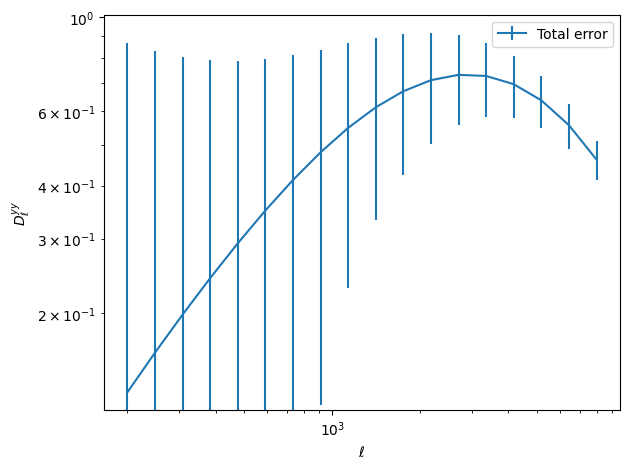

omega_cdm = 0.116816
ln(10^{10} A_s) = 3.038456


In [2]:
#title version 

from theoretical_power_spec import compute_tsz_power_with_errors_from_title_or_csv
import tszpower as tsz

title = "/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/10_cats/cosmo_000_df_row0000"
ell, D, err_full, err_gauss, allpars = compute_tsz_power_with_errors_from_title_or_csv(
    title,
    show_plot=True,     
    use_full_error=True,
    f_sky=1.9425e-03
)


print("omega_cdm =", allpars["omega_cdm"])
print("ln(10^{10} A_s) =", allpars["ln10^{10}A_s"])

Theoretical trispectrum

/rds/rds-clecat/pipeline_alina_full/alina_paper/theoretical_cov_en.py:174: DeprecationWarning: compute_class_szfast is deprecated. Use initialize_classy_szfast instead.
  tsz.initialise()


[compute_theoretical_covariance_from_source] Elapsed: 1.325178 s


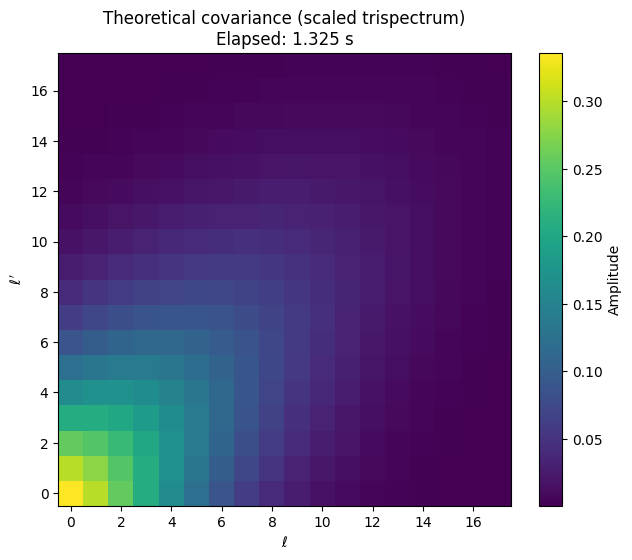

In [3]:
#Accepts csv and titles
from theoretical_cov_en import compute_theoretical_covariance_from_source

csv_path = "/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/coords_100_cats/cosmo_000_df_row0000/logA=3.038456_Oc0h2=0.116816_0000_with_coords.csv"  
cov, fig = compute_theoretical_covariance_from_source(
    csv_path,
    use_scaled=True, show=True, f_sky = 1.9425e-03
)

# Empirical statistics

Empirical power spectrum

Grouped mode detected: 5 subfolders containing cosmologies found

=== Cosmology: logA=2.884068_Oc0h2=0.121944 ===
[1/10] y_map_10.0deg_0.500arcmin_0.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[2/10] y_map_10.0deg_0.500arcmin_1.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[3/10] y_map_10.0deg_0.500arcmin_2.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[4/10] y_map_10.0deg_0.500arcmin_3.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[5/10] y_map_10.0deg_0.500arcmin_4.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[6/10] y_map_10.0deg_0.500arcmin_5.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[7/10] y_map_10.0deg_0.500arcmin_6.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[8/10] y_map_10.0deg_0.500arcmin_7.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[9/10] y_map_10.0deg_0.500arcmin_8.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[10/10] y_map_10.0deg_0.500arcmin_9.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03


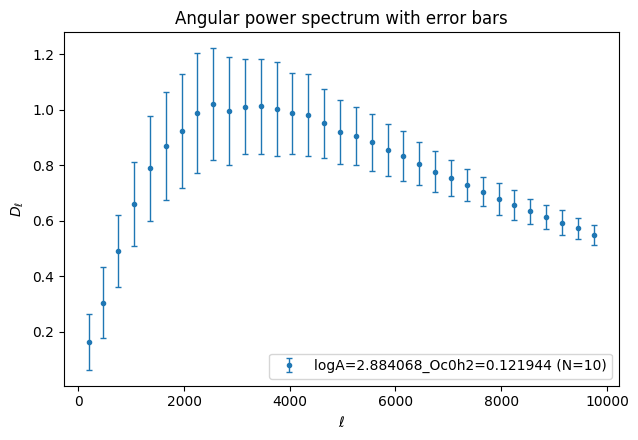

Executed. Patches: 10 | mean f_sky(eff) = 1.9425e-03
Runtime: 1.296 s
Summary mean/std written: /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_dell/logA=2.884068_Oc0h2=0.121944_meanstd.csv

=== Cosmology: logA=2.910129_Oc0h2=0.108687 ===
[1/10] y_map_10.0deg_0.500arcmin_10.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[2/10] y_map_10.0deg_0.500arcmin_11.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[3/10] y_map_10.0deg_0.500arcmin_12.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[4/10] y_map_10.0deg_0.500arcmin_13.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[5/10] y_map_10.0deg_0.500arcmin_14.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[6/10] y_map_10.0deg_0.500arcmin_15.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[7/10] y_map_10.0deg_0.500arcmin_16.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[8/10] y_map_10.0deg_0.500arcmin_17.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[9/10] y_map_10.0deg_0.500arcmin

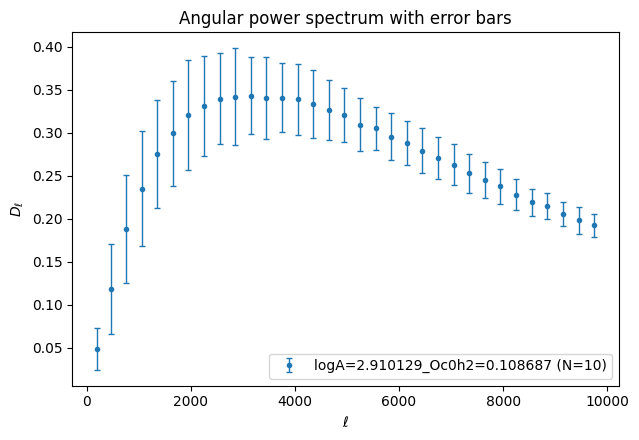

Executed. Patches: 10 | mean f_sky(eff) = 1.9425e-03
Runtime: 1.282 s
Summary mean/std written: /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_dell/logA=2.910129_Oc0h2=0.108687_meanstd.csv

=== Cosmology: logA=3.033971_Oc0h2=0.12985 ===
[1/10] y_map_10.0deg_0.500arcmin_20.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[2/10] y_map_10.0deg_0.500arcmin_21.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[3/10] y_map_10.0deg_0.500arcmin_22.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[4/10] y_map_10.0deg_0.500arcmin_23.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[5/10] y_map_10.0deg_0.500arcmin_24.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[6/10] y_map_10.0deg_0.500arcmin_25.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[7/10] y_map_10.0deg_0.500arcmin_26.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[8/10] y_map_10.0deg_0.500arcmin_27.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[9/10] y_map_10.0deg_0.500arcmin_

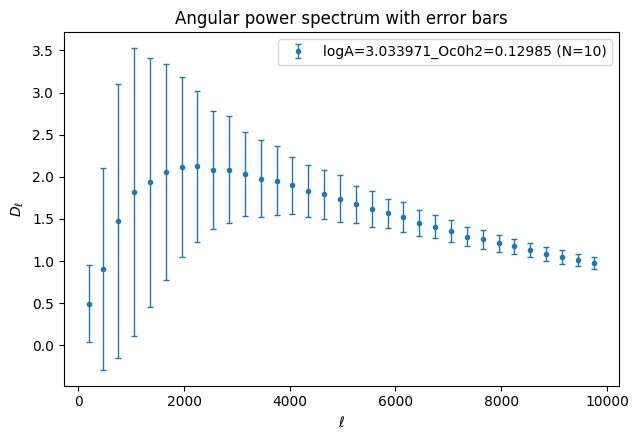

Executed. Patches: 10 | mean f_sky(eff) = 1.9425e-03
Runtime: 1.220 s
Summary mean/std written: /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_dell/logA=3.033971_Oc0h2=0.12985_meanstd.csv

=== Cosmology: logA=3.038456_Oc0h2=0.116816 ===
[1/10] y_map_10.0deg_0.500arcmin_30.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[2/10] y_map_10.0deg_0.500arcmin_31.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[3/10] y_map_10.0deg_0.500arcmin_32.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[4/10] y_map_10.0deg_0.500arcmin_33.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[5/10] y_map_10.0deg_0.500arcmin_34.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[6/10] y_map_10.0deg_0.500arcmin_35.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[7/10] y_map_10.0deg_0.500arcmin_36.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[8/10] y_map_10.0deg_0.500arcmin_37.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[9/10] y_map_10.0deg_0.500arcmin_

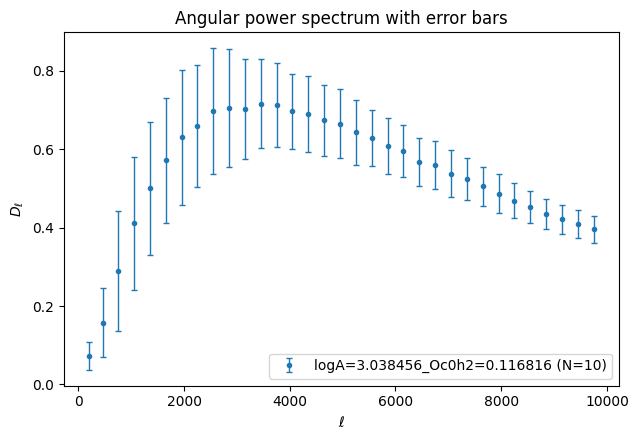

Executed. Patches: 10 | mean f_sky(eff) = 1.9425e-03
Runtime: 1.270 s
Summary mean/std written: /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_dell/logA=3.038456_Oc0h2=0.116816_meanstd.csv

=== Cosmology: logA=3.570701_Oc0h2=0.092288 ===
[1/10] y_map_10.0deg_0.500arcmin_40.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[2/10] y_map_10.0deg_0.500arcmin_41.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[3/10] y_map_10.0deg_0.500arcmin_42.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[4/10] y_map_10.0deg_0.500arcmin_43.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[5/10] y_map_10.0deg_0.500arcmin_44.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[6/10] y_map_10.0deg_0.500arcmin_45.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[7/10] y_map_10.0deg_0.500arcmin_46.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[8/10] y_map_10.0deg_0.500arcmin_47.fits  f_sky(full)=2.4210e-03  f_sky(eff)=1.9425e-03
[9/10] y_map_10.0deg_0.500arcmin

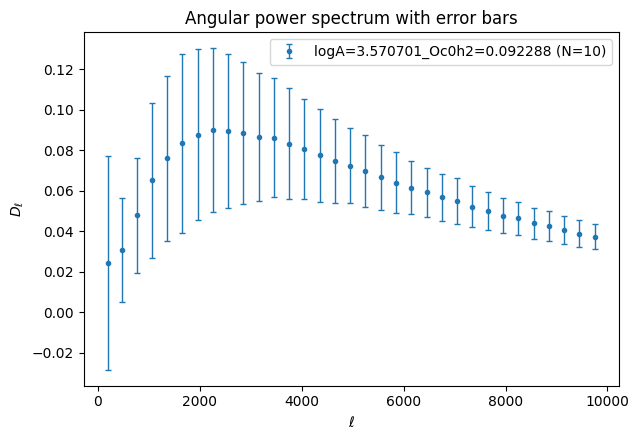

Executed. Patches: 10 | mean f_sky(eff) = 1.9425e-03
Runtime: 1.167 s
Summary mean/std written: /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_dell/logA=3.570701_Oc0h2=0.092288_meanstd.csv

Runtime (grouped mode): 6.241 s


In [1]:
from emp_ps_en import compute_dell_empiriques

res = compute_dell_empiriques("/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/fixed_4",
    plot=True, area_weighted=False,
    save_csv="/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_dell",    
    save_plot="/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_dell/fig.png")

Wavelet scattering transforms

Grouped mode detected: 5 subdirectories found.

=== Cosmology: logA=2.884068_Oc0h2=0.121944 ===
use torch backend
[export] samples -> /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/wst/wst_example/logA=2.884068_Oc0h2=0.121944_samples.csv (format=long, kinds=S1,S0)


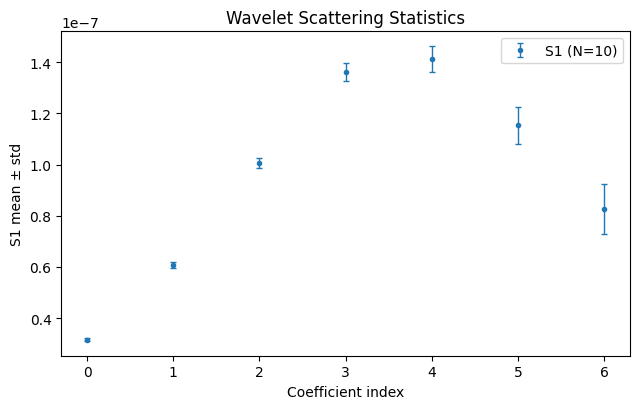

[timing] elapsed = 22.434 s

=== Cosmology: logA=2.910129_Oc0h2=0.108687 ===
[export] samples -> /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/wst/wst_example/logA=2.910129_Oc0h2=0.108687_samples.csv (format=long, kinds=S1,S0)


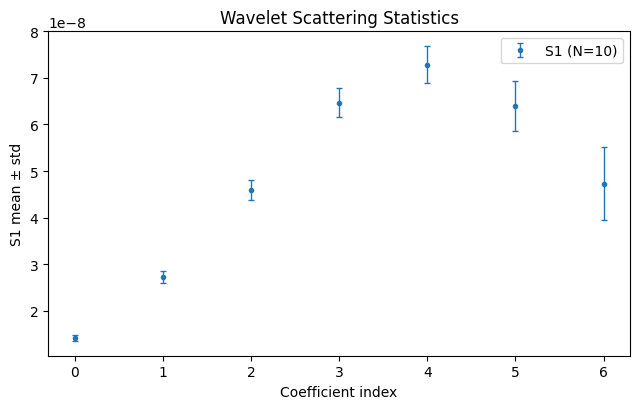

[timing] elapsed = 21.827 s

=== Cosmology: logA=3.033971_Oc0h2=0.12985 ===
[export] samples -> /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/wst/wst_example/logA=3.033971_Oc0h2=0.12985_samples.csv (format=long, kinds=S1,S0)


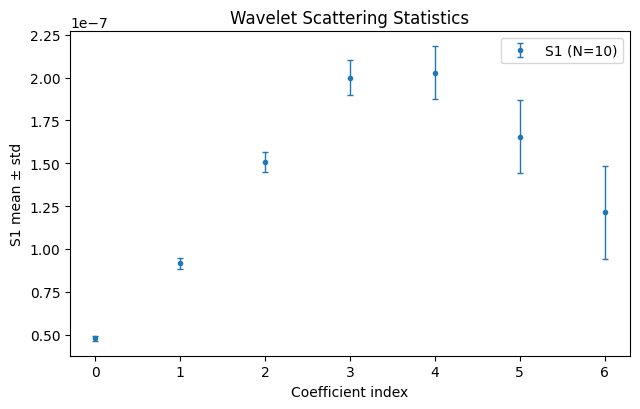

[timing] elapsed = 22.021 s

=== Cosmology: logA=3.038456_Oc0h2=0.116816 ===
[export] samples -> /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/wst/wst_example/logA=3.038456_Oc0h2=0.116816_samples.csv (format=long, kinds=S1,S0)


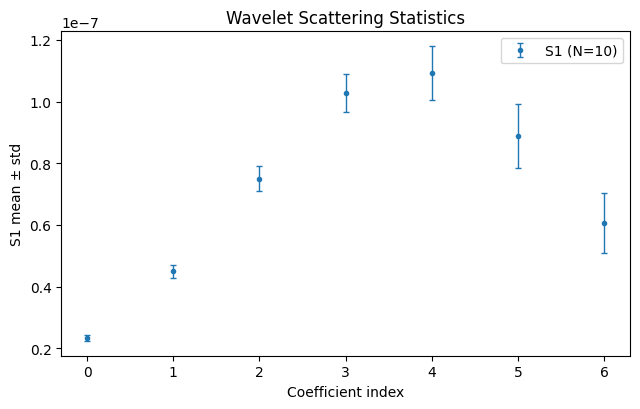

[timing] elapsed = 21.361 s

=== Cosmology: logA=3.570701_Oc0h2=0.092288 ===
[export] samples -> /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/wst/wst_example/logA=3.570701_Oc0h2=0.092288_samples.csv (format=long, kinds=S1,S0)


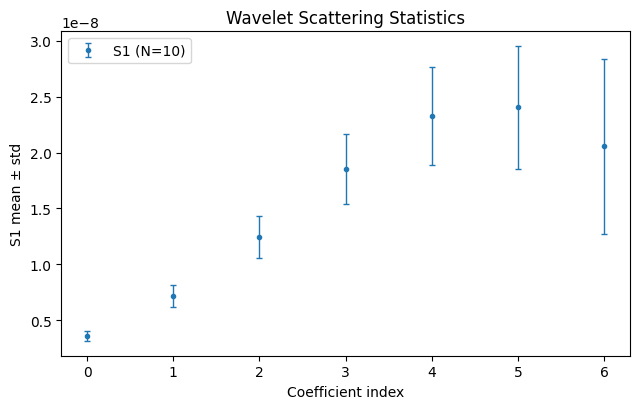

[timing] elapsed = 22.692 s
[timing] grouped total elapsed = 110.378 s


In [5]:
import sys
sys.path.insert(0, "/rds/rds-clecat/pipeline_alina_full/alina_paper/scattering_transform")

from wst_en import compute_wst_S012

res = compute_wst_S012(
    "/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/fixed_4",   # parent folder containing sub-folders
    J=7, L=4,
    device="auto",
    whiten=False,
    samples_format='long', #to keep all the coefs
    plot=True,
    which="S1",
    save_samples_csv="/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/wst/wst_example/", 
    save_plot="/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/wst/wst_example_plot/", 
    quiet=False
)


Covariance

[ok] covariance -> out/cov_all.npz


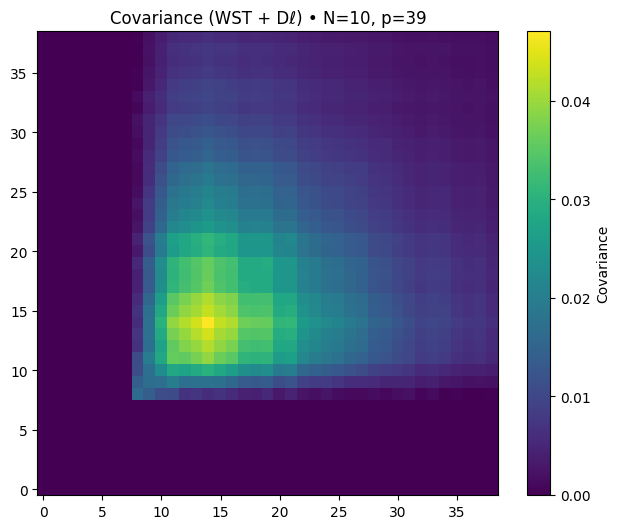

[info] Time : 0.132 sec
[ok] C built • N=10, p=39 • WST=(10, 8) • D_ell=(10, 31)


In [4]:
from cov_en import compute_covariance_mixed

res = compute_covariance_mixed(
    wst_inputs="/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/wst/wst_coefs_test_50_3/logA=2.884068_Oc0h2=0.121944_samples.csv",
    dell_inputs="/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/example_dell_logA=2.884068_Oc0h2=0.121944.csv",
    align="truncate",
    save_npz="out/cov_all.npz",
    plot=True,
)
C = res["cov"]

Correlation matrix

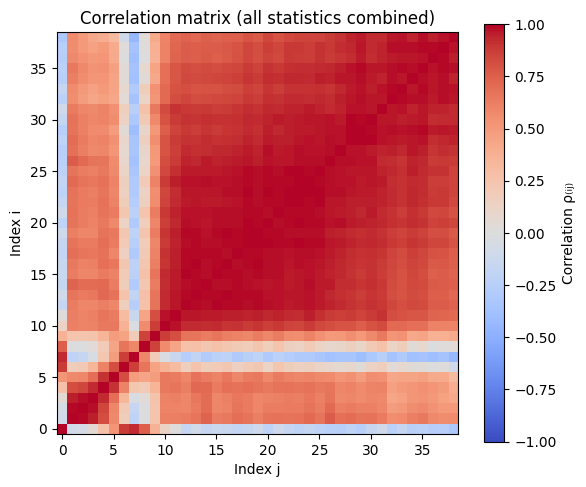

array([[ 1.        , -0.09263023, -0.05805546, ..., -0.26262773,
        -0.25259109, -0.31943139],
       [-0.09263023,  1.        ,  0.98903103, ...,  0.57673667,
         0.55763472,  0.57012531],
       [-0.05805546,  0.98903103,  1.        , ...,  0.5313785 ,
         0.49583923,  0.49256312],
       ...,
       [-0.26262773,  0.57673667,  0.5313785 , ...,  1.        ,
         0.98844402,  0.94814711],
       [-0.25259109,  0.55763472,  0.49583923, ...,  0.98844402,
         1.        ,  0.97030424],
       [-0.31943139,  0.57012531,  0.49256312, ...,  0.94814711,
         0.97030424,  1.        ]])

In [5]:
from correlation import covariance_to_correlation
covariance_to_correlation(C)

# Generation from statistics

Power spectrum

/rds/rds-clecat/pipeline_alina_full/alina_paper/scattering_transform/ST.py:493: SyntaxWarning: invalid escape sequence '\s'
  '''
INFO:generator_en:_read_csv_detect_type executed in 0.026s
INFO:generator_en:Generation via power spectrum (mode 'spectrum').
INFO:generator_en:_parse_spectrum_df executed in 0.000s
INFO:generator_en:_build_fourier_amplitude_from_spectrum executed in 0.001s
INFO:generator_en:_hermitian_symmetric_complex_field executed in 0.099s


use torch backend


INFO:generator_en:generate_patch_from_csv executed in 0.167s


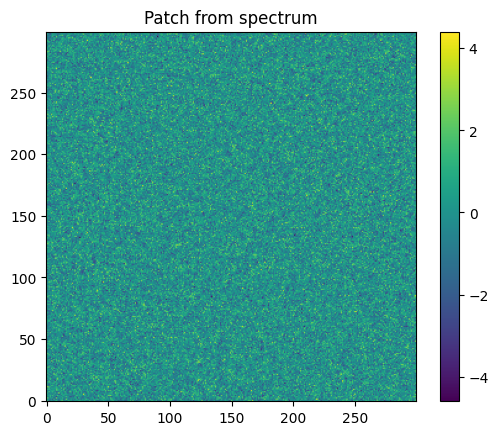

In [6]:
import sys
sys.path.insert(0, "/rds/rds-clecat/pipeline_alina_full/alina_paper/scattering_transform")
from generator_en import generate_patch_from_csv
import matplotlib.pyplot as plt

patch = generate_patch_from_csv(
    method='spectrum',
    patch_size=(300, 300),
    pixel_scale_arcmin=0.5,  
    csv_path='/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/Dl/test_6/means/logA=2.884068_Oc0h2=0.121944_meanstd.csv',
    seed=42,
    output_path='/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/Dl/patch_from_spectrum_0.npy'
)

plt.imshow(patch, origin='lower'); plt.colorbar(); plt.title('Patch from spectrum'); plt.show()


Scattering transforms

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
from astropy.io import fits
import synthese_fits 
import ST


FITS_FILE_PATH = '/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/paints_100/y_map_10.0deg_2.000arcmin_0.fits' 
SAVE_DIR = '/rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/paints_100/wst_sytn' 

M = 256 
N = M
J = 25
L = 10

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = "cpu"
print(f"Using device: {device.upper()}")

random_seed = 987

print(f"Loading image from: {FITS_FILE_PATH}")
target_image = synthese_fits.load_fits_image(FITS_FILE_PATH)
target_image = target_image[:M, :N]

print("Generating filters and calculators...")
filters_set = ST.FiltersSet(M=M, N=N, J=J, L=L).generate_morlet(if_save=False)
ST_calculator = ST.ST_2D(filters_set, J, L, device=device)

bin_edges = np.linspace(150/(360/3.5), M/2*1.4, 7)
bispectrum_calculator = ST.Bispectrum_Calculator(bin_edges, M, N, device=device)
synthese_fits.ST_calculator = ST_calculator
synthese_fits.bispectrum_calculator = bispectrum_calculator

import time
print("Starting image synthesis...")
start_time = time.time()
synthesised_image = synthese_fits.image_synthesis(
    target_image, J=J, L=L, num_pixel=M,
    learnable_param_list=[
        (200, 5e-3), (200, 1e-3), (200, 1e-3),
        (100, 5e-4), (200, 2e-4), (100, 1e-4),
    ],
    savedir=SAVE_DIR,
    device=device,
    coef='ST',
    random_seed=random_seed,
    low_bound=-0.015,
)

print(f"Synthesis finished in {time.time() - start_time:.2f} seconds.")

synthesised_image = synthesised_image[0]

plt.figure(figsize=(18, 6))
vmin = np.percentile(target_image, 1)
vmax = np.percentile(target_image, 99)

plt.subplot(1, 3, 1)
plt.imshow(target_image, vmin=vmin, vmax=vmax, cmap='viridis')
plt.title('Target Image')

plt.subplot(1, 3, 2)
plt.imshow(synthesised_image, vmin=vmin, vmax=vmax, cmap='viridis')
plt.title('Synthesized Image')

plt.subplot(1, 3, 3)
plt.hist(target_image.ravel(), bins=100, histtype='step', label='Target', density=True)
plt.hist(synthesised_image.ravel(), bins=100, histtype='step', label='Synthesized', density=True)
plt.yscale('log')
plt.legend()
plt.title('Histogram')
plt.show()

Using device: CPU
Loading image from: /rds/rds-clecat/pipeline_alina_full/alina_paper/pipeline_outputs/paints_100/y_map_10.0deg_2.000arcmin_0.fits
Generating filters and calculators...


/rds/rds-clecat/pipeline_alina_full/alina_paper/pipe_env/lib/python3.12/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Starting image synthesis...
Step 0
  loss: 41753164.0000
  loss_mean: 0.0000
  loss_bound: 0.0067
  loss_L1: 40564404.0000
  loss_ST: 1188761.2500
Step 100
  loss: nan
  loss_mean: nan
  loss_bound: nan
  loss_L1: nan
  loss_ST: nan


# Validation of empirical results

In [ ]:
from validation_ps import valid

val = validation_ps(
    theory=(ell, D),
    empirical=(res["ell"][2:], res["D_ell_mean"][2:]),
    yerr_emp=res.get("D_ell_std", None)[2:],
    yerr_th=err_full,
    ell_range=(300, 8000),   
    plot=True,
    xscale="linear",
    yscale="linear",
    return_interp=True
)

print(res["D_ell_mean"].mean())
print(
    f"Δ_rel mean={val['rel_mean']:.3e} | median={val['rel_median']:.3e} | "
    f"RMSE={val['rel_rmse']:.3e} | max|Δ|={val['rel_max_abs']:.3e}"
)
if "w_rel_mean" in val:
    print(f" mean={val['w_rel_mean']:.3e} | RMSE={val['w_rel_rmse']:.3e}")
